In [19]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ccdefault.csv")
data.drop('ID',axis=1,inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# random train test split 
X=data[data.columns[:-1]]
y=data["DEFAULT"]
score1=[]
score2=[]
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=i) 
    tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
    tree.fit(X_train, y_train)
    score1.append(accuracy_score(y_train,tree.predict(X_train)))
    score2.append(accuracy_score(y_test,tree.predict(X_test)))

print(score1)
print(score2)


[0.823037037037037, 0.8231851851851851, 0.821962962962963, 0.8245555555555556, 0.8227037037037037, 0.8241111111111111, 0.8238148148148148, 0.8222962962962963, 0.8235555555555556, 0.822]
[0.8236666666666667, 0.8246666666666667, 0.8366666666666667, 0.8106666666666666, 0.83, 0.812, 0.819, 0.8296666666666667, 0.8173333333333334, 0.8326666666666667]


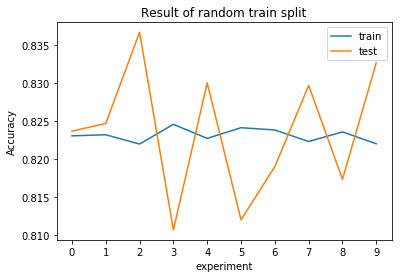

In [4]:
plt.title('Result of random train split')
plt.xticks([i for i in range(10)])
plt.plot(score1)
plt.plot(score2)
plt.legend(['train', 'test'])
plt.xlabel('experiment')
plt.ylabel('Accuracy')
plt.show()

In [20]:
table= PrettyTable(['  ','Mean of Accuracy', 'Standard Error of Accuracy'])
table.add_row(['train set', np.mean(score1), np.std(score1)])
table.add_row(['test set', np.mean(score2), np.std(score2)])
print(table)

+-----------+--------------------+----------------------------+
|           |  Mean of Accuracy  | Standard Error of Accuracy |
+-----------+--------------------+----------------------------+
| train set | 0.8231222222222222 |   0.0008468532894351726    |
|  test set | 0.8236333333333332 |    0.00833126641033642     |
+-----------+--------------------+----------------------------+


In [23]:
# cross validation-part2
fold=StratifiedKFold(n_splits=10, random_state=11)
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)
tree.fit(X_train,y_train)
y_test_pred = tree.predict(X_test)
cv_scores= cross_validate(tree,X,y,cv=fold,return_train_score=True)

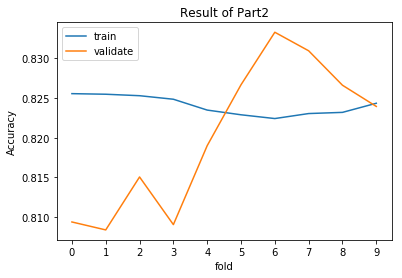

In [17]:
plt.title('Part2')
plt.xticks([i for i in range(10)])
plt.plot(cv_scores['train_score'])
plt.plot(cv_scores['test_score'])
plt.legend(['train', 'validate'])
plt.xlabel('fold')
plt.ylabel('Accuracy')
plt.show()

In [21]:
mean_score1=[]
mean_score2=[]
for i in range (1,11):
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)
    tree.fit(X_train,y_train)
   
    cv_scores1 = cross_val_score(tree,X_train,y_train,cv=10)
    cv_scores2=cross_val_score(tree,X_test,y_test,cv=10)
    mean_score1.append(np.mean(cv_scores1))
    mean_score2.append(np.mean(cv_scores2))
print(mean_score1)
print(mean_score2)

[0.819629784321517, 0.8196297980338594, 0.819703858395591, 0.819703858395591, 0.819703858395591, 0.819666821358554, 0.819703858395591, 0.819703858395591, 0.819629784321517, 0.819703858395591]
[0.8086504998203683, 0.8086504998203683, 0.8083182739067472, 0.8083182739067472, 0.8083182739067472, 0.8083182739067472, 0.8076538220795045, 0.8086504998203683, 0.8086504998203683, 0.8083182739067472]


In [22]:
table= PrettyTable(['  ','Mean of Accuracy', 'Standard Error of Accuracy'])
table.add_row(['train set', np.mean(mean_score1), np.std(mean_score1)])
table.add_row(['validate set', np.mean(mean_score2), np.std(mean_score2)])
print(table)

+--------------+--------------------+----------------------------+
|              |  Mean of Accuracy  | Standard Error of Accuracy |
+--------------+--------------------+----------------------------+
|  train set   | 0.8196779338408995 |   3.333135285663163e-05    |
| validate set | 0.8083847190894714 |   0.0002896278367800907    |
+--------------+--------------------+----------------------------+


In [24]:
print("My name is Yuli Tang")
print("My NetID is: ytang56")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yuli Tang
My NetID is: ytang56
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
